# StellarGraph examples

The StellarGraph object is a subclass of NetworkX MultiGraph, and has all the features built into NetworkX.


Some example graphs

In [369]:
import networkx as nx
from stellar.data.stellargraph import *
from stellar.data.loader import *

In [13]:
%reload_ext autoreload
%autoreload 2

We can create StellarGraph objects from NetworkX graphs:

By default the edge types will be empty strings.

In [466]:
G = StellarGraph(nx.karate_club_graph())
G

StellarGraph: Undirected multigraph
    Nodes: 34, Edges: 78

Note that certain NX operations will return a NetworkX object, not a StellarGraph object:

In [371]:
nx.subgraph(G, [0])

In [224]:
G.copy()

In [345]:
G.to_directed()

To create a heterogenous graph we need to specify node and/or edge labels:

In [373]:
G = StellarGraph()
G.add_nodes_from([0, 1, 2, 3], label="movie")
G.add_nodes_from([4, 5], label="user")
e_keys = G.add_edges_from([(0, 4), (1, 4), (1, 5), (2, 4), (3, 5)], label="rating")

We can query the object to find more information about the Graph types

In [374]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 6, Edges: 5

 Node types:
  movie: [4]
    Edge types: movie-rating->user
  user: [2]
    Edge types: user-rating->movie

 Edge types:
    movie-rating->user: [5]



Add some more edges to form a real multigraph

In [375]:
e_keys = G.add_edges_from([(0, 4), (1, 4)], label="another")
e_keys = G.add_edges_from([(4, 5)], label="friend")

In [377]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 6, Edges: 8

 Node types:
  movie: [4]
    Edge types: movie-another->user, movie-rating->user
  user: [2]
    Edge types: user-another->movie, user-friend->user, user-rating->movie

 Edge types:
    movie-another->user: [2]
    movie-rating->user: [5]
    user-friend->user: [1]



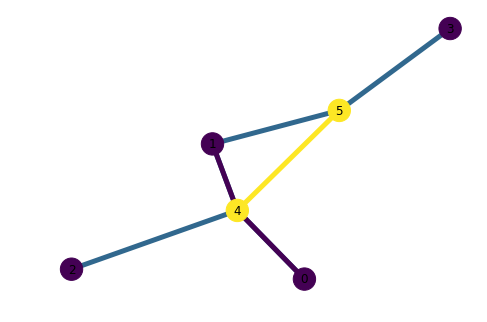

In [397]:
sg = G.create_graph_schema(create_type_maps=True)
nx.draw(G, with_labels=True, width=5, node_size=500,
        node_color=[sg.get_node_type(n,True) for n in G],
        edge_color=[sg.get_edge_type(e,True) for e in G.edges(keys=True)])

## Loading graphs from different formats

EPGM formats are ideal for storing heterogeneous graphs. They are handled through a helper function:

In [464]:
graph_loc = "../tests/resources/data/yelp/yelp.epgm"
G = from_epgm(graph_loc, directed=True)

...reading ../tests/resources/data/yelp/yelp.epgm/graphs.json using utf-8 encoding...
...reading ../tests/resources/data/yelp/yelp.epgm/vertices.json using utf-8 encoding...
...reading ../tests/resources/data/yelp/yelp.epgm/edges.json using utf-8 encoding...
Converting the EPGM graph 59be1422c4785d276d9c3658 to NetworkX graph...
Graph statistics: 621 nodes, 6832 edges


In [465]:
print(G.info())

StellarDiGraph: Directed multigraph
 Nodes: 621, Edges: 6832

 Node types:
  business: [10]
        Attributes: {'BusinessAcceptsCreditCards', 'BikeParking', 'state', 'GoodForKids', 'Smoking', 'city', 'name', 'categories', 'NoiseLevel', 'DriveThru', 'WiFi', 'DogsAllowed', 'yelpId', 'Alcohol', 'RestaurantsPriceRange2', 'stars', 'HappyHour', 'HasTV'}
    Edge types: business-locatedIn->city
  city: [3]
        Attributes: {'name'}
    Edge types: city-state->state
  review: [37]
        Attributes: {'useful', 'userId', 'businessId', 'yelpId', 'stars'}
    Edge types: review-towards->business
  state: [2]
        Attributes: {'name'}
    Edge types: 
  user: [569]
        Attributes: {'elite', 'useful', 'compliment_more', 'cool', 'compliment_profile', 'compliment_note', 'compliment_funny', 'compliment_cute', 'compliment_hot', 'name', 'compliment_writer', 'yelpId', 'compliment_cool', 'funny', 'fans', 'compliment_plain', 'average_stars', 'compliment_photos', 'compliment_list'}
    Edge type

## Graph Schema

The graph schema gives information on the node and edge types 

In [407]:
G = StellarGraph()
G.add_nodes_from([0, 1, 2, 3], label="movie")
G.add_nodes_from([4, 5], label="user")
e_keys = G.add_edges_from([(0, 4), (1, 4), (1, 5), (2, 4), (3, 5)], label="rating")
e_keys = G.add_edges_from([(0, 4), (1, 4)], label="another")
e_keys = G.add_edges_from([(4, 5)], label="friend")

gs = G.create_graph_schema(create_type_maps=True)
gs

GraphSchema:
node type: movie
   movie -- another -> user
   movie -- rating -> user
node type: user
   user -- another -> movie
   user -- friend -> user
   user -- rating -> movie

Note that we have edge types move-rating->user as this is an undirected graph.  If we convert it to a directional graph, we have the expected semantics of our edge types:

In [421]:
Gd = StellarDiGraph()
Gd.add_nodes_from([0, 1, 2, 3], label="movie")
Gd.add_nodes_from([4, 5], label="user")
e_keys = Gd.add_edges_from([(0, 4), (1, 4), (1, 5), (2, 4), (3, 5)], label="rating")
e_keys = Gd.add_edges_from([(0, 4), (1, 4)], label="another")
e_keys = Gd.add_edges_from([(4, 5)], label="friend")
Gd.create_graph_schema()

GraphSchema:
node type: movie
   movie -- another -> user
   movie -- rating -> user
node type: user
   user -- friend -> user

The node edges and types are available. The ordering of these is important and maintained in all methods:

In [422]:
gs.schema['user']

[EdgeType(n1='user', rel='another', n2='movie'),
 EdgeType(n1='user', rel='friend', n2='user'),
 EdgeType(n1='user', rel='rating', n2='movie')]

In [423]:
gs.node_types

['movie', 'user']

In [424]:
gs.edge_types

[EdgeType(n1='movie', rel='another', n2='user'),
 EdgeType(n1='movie', rel='rating', n2='user'),
 EdgeType(n1='user', rel='another', n2='movie'),
 EdgeType(n1='user', rel='friend', n2='user'),
 EdgeType(n1='user', rel='rating', n2='movie')]

Nodes and edges have indices that should be extracted using the node_index and edge_index functions:

In [425]:
gs.node_index('movie')

0

In [426]:
gs.edge_index(('movie', 'rating', 'user'))

1

The graph schema can be used to quickly look up node and edge types:

In [427]:
gs.get_node_type(0)

'movie'

We can easily do filtering of nodes and edges based on types:

The edge type is specified to be a triple:

In [428]:
[ n for n in G if gs.get_node_type(n) == 'user' ]

[4, 5]

In [429]:
gs.get_edge_type((0,4,0))

EdgeType(n1='movie', rel='rating', n2='user')

In [430]:
[ e for e in G.edges(keys=True) if gs.get_edge_type(e) == ('movie', 'rating', 'user') ]

[(0, 4, 0), (1, 4, 0), (1, 5, 0), (2, 4, 0), (3, 5, 0)]

This is a named tuple, so we can compare edges with tuples:

In [431]:
gs.get_edge_type((0,4,0)) == ('movie', 'rating', 'user')

True

In [432]:
gs.edge_index(('movie', 'rating', 'user'))

1

In [433]:
[ n for n in G if gs.get_node_type(n) == 'user' ]

[4, 5]

Note that StellarGraph assumes there is only a single edge with the same edge type between two noddes.

This isn't enforced ATM so things may break if we add multiple edges with the same edge type, even though NetworkX supports this by creating a new edge key.

In [438]:
G.add_edges_from([(0,4)], label="another")
gs = G.create_graph_schema(create_type_maps=True)

In [439]:
[ e for e in G.edges(keys=True) if gs.get_edge_type(e) == ('movie', 'another', 'user') ]

[(0, 4, 1), (0, 4, 2), (0, 4, 3), (1, 4, 1)]

In [440]:
gs.edge_types_for_node_type('user')

[EdgeType(n1='user', rel='another', n2='movie'),
 EdgeType(n1='user', rel='friend', n2='user'),
 EdgeType(n1='user', rel='rating', n2='movie')]

Or the sampling adjacency list schema (for GraphSAGE)

In [442]:
gs.schema['user']

[EdgeType(n1='user', rel='another', n2='movie'),
 EdgeType(n1='user', rel='friend', n2='user'),
 EdgeType(n1='user', rel='rating', n2='movie')]

In [443]:
gs.get_type_adjacency_list(['user', 'movie'], n_hops=2)

[('user', [2, 3, 4]),
 ('movie', [5, 6]),
 ('movie', [7, 8]),
 ('user', [9, 10, 11]),
 ('movie', [12, 13]),
 ('user', [14, 15, 16]),
 ('user', [17, 18, 19]),
 ('user', []),
 ('user', []),
 ('movie', []),
 ('user', []),
 ('movie', []),
 ('user', []),
 ('user', []),
 ('movie', []),
 ('user', []),
 ('movie', []),
 ('movie', []),
 ('user', []),
 ('movie', [])]